## Introduction

In this project we want to predict whether a customer of an online store will finalize its purchase. Afer preprocessing and visualizing data, we predict the user behavior using SVM, KNN, Logistic Regression models. 

The data explanations are as follows: 

| Column Name | Column Description       
| :- |:-
|Administrative | The number of times the user has visited the account management pages.
|Administrative Duration | The length of time the user has visited the account management pages. 
|Informational| The number of times a user has visited store information and contact pages. 
|Informational Duration| The length of time the user has visited the store information pages and contact channels. 
|Products Related | The number of times the user has visited the product pages. 
|Products Related Duration | The length of time the user has visited the product pages. 
|Bounce Rate | The average bounce rate of users of this page. This feature is the average number of times different users enter this page directly from the site and leave the site without taking any action. 
|Exit Rate | The average exit rate of users from this page. This feature is the average number of times that different users have entered the site, and seeing this page was the last page they visited. 
|Page Value | Is the average value of the product page, meaning that a user has seen the page before completing their transaction. The user's transaction can be his purchase. 
|Special Day | The proximity of the day the transaction has taken place to a specific day in the calendar.

The categorical features are as follows: 

| Column Name | Column Description       
| :- |:-
|Operating Systems | The operating system through which the user buys. 
|Browser | The browser through which the user makes a purchase. 
|Region | The area where the user starts their actions with the website. 
|TrafficType | The type of traffic through which the user enters the site. Like banner ads, SMS, direct. 
|VisitorType | The type of user that can be a new user, or an old user or another. 
|Weekend | Did the transaction take place during the weekend? 
|Month | The month in which the transaction took place. 
|Revenue | Transaction label, which indicates whether the transaction has ended in revenue or not. We intend to anticipate this label. 

## Imports Part

In [1]:
import pandas as pd
import numpy as np
# !pip install pandas_profiling==2.7.1
from pandas_profiling import ProfileReport
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Reading csv File

In [2]:
df = pd.read_csv('OnlineShopData.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0.0,NaN,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

## Preprocessing Part

In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12215.000000,12225.000000,12196.000000,12204.000000,12196.000000,12191.000000,12216.000000,12208.000000,12222.000000,12201.000000,12214.000000,12218.000000,12204.000000,12179.000000
mean,2.315759,80.741179,0.502706,34.733067,31.814447,1192.220406,0.022231,0.043050,5.869171,0.061011,2.124857,2.358324,3.146673,4.069464
std,3.319969,176.660783,1.271342,141.364602,44.607472,1905.738105,0.048569,0.048543,18.545277,0.198111,0.912112,1.716343,2.401164,4.030383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.050000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,598.450000,0.003098,0.025183,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.750000,0.000000,0.000000,38.000000,1464.986002,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
df.isna().sum()

Administrative             115
Administrative_Duration    105
Informational              134
Informational_Duration     126
ProductRelated             134
ProductRelated_Duration    139
BounceRates                114
ExitRates                  122
PageValues                 108
SpecialDay                 129
Month                      118
OperatingSystems           116
Browser                    112
Region                     126
TrafficType                151
VisitorType                116
Weekend                    131
Revenue                      0
dtype: int64

In [6]:
df.Administrative.fillna(random.choice(df["Administrative"].dropna().unique()), inplace = True)
df.Administrative_Duration.fillna(random.choice(df["Administrative_Duration"].dropna().unique()), inplace = True)
df.Informational.fillna(random.choice(df["Informational"].dropna().unique()), inplace = True)
df.Informational_Duration.fillna(random.choice(df["Informational_Duration"].dropna().unique()), inplace = True)
df.ProductRelated.fillna(random.choice(df["ProductRelated"].dropna().unique()), inplace = True)
df.ProductRelated_Duration.fillna(random.choice(df["ProductRelated_Duration"].dropna().unique()), inplace = True)
df.BounceRates.fillna(random.choice(df["BounceRates"].dropna().unique()), inplace = True)
df.ExitRates.fillna(random.choice(df["ExitRates"].dropna().unique()), inplace = True)
df.PageValues.fillna(random.choice(df["PageValues"].dropna().unique()), inplace = True)
df.SpecialDay.fillna(random.choice(df["SpecialDay"].dropna().unique()), inplace = True)

df.OperatingSystems.fillna(df.OperatingSystems.mode()[0], inplace = True)
df.Browser.fillna(df.Browser.mode()[0], inplace = True)
df.Region.fillna(df.Region.mode()[0], inplace = True)
df.TrafficType.fillna(df.TrafficType.mode()[0], inplace = True)
df.VisitorType.fillna(df.VisitorType.mode()[0], inplace = True)
df.Weekend.fillna(df.Weekend.mode()[0], inplace = True)
df.Month.fillna(df.Month.mode()[0], inplace = True)


df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
# profile = ProfileReport(df)
# profile.to_file("report.html")
# profile.to_notebook_iframe()

## Plot Distribution of each Column Over Revenue

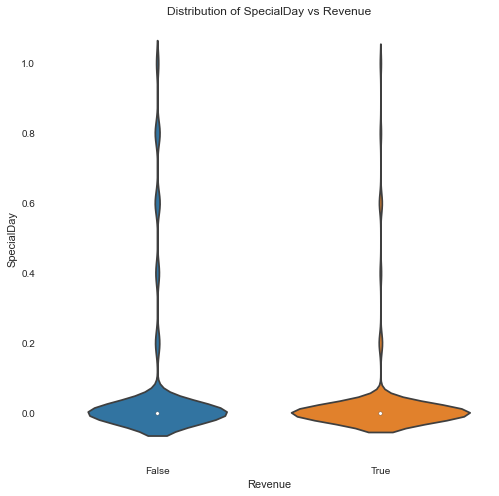

In [8]:
plt.figure(figsize=(8,8))
sns.violinplot(data=df, x='Revenue' ,y='SpecialDay')
plt.title('Distribution of SpecialDay vs Revenue');

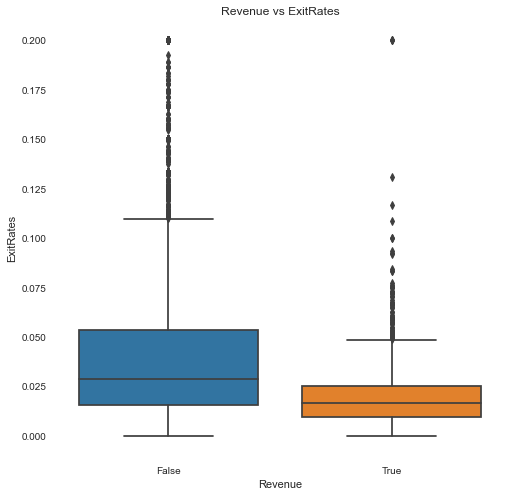

In [9]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='Revenue' ,y='ExitRates')
plt.title('Revenue vs ExitRates');

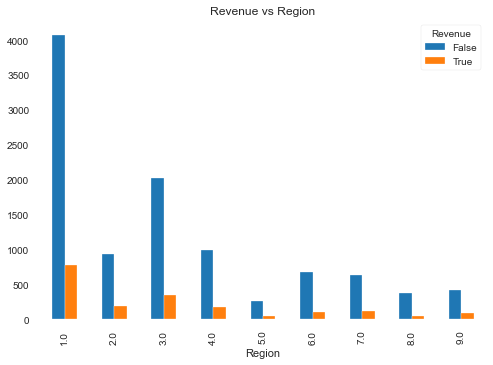

In [10]:
pd.crosstab(df.Region, df.Revenue).plot(kind='bar', title='Revenue vs Region');

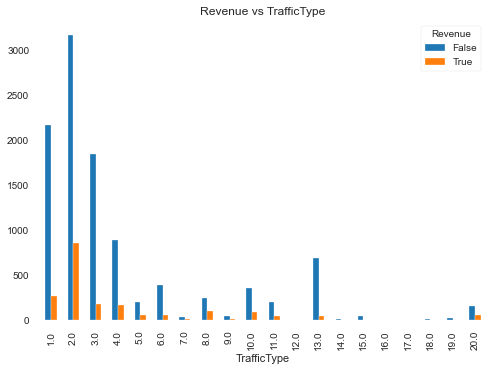

In [11]:
pd.crosstab(df.TrafficType, df.Revenue).plot(kind='bar', title='Revenue vs TrafficType');

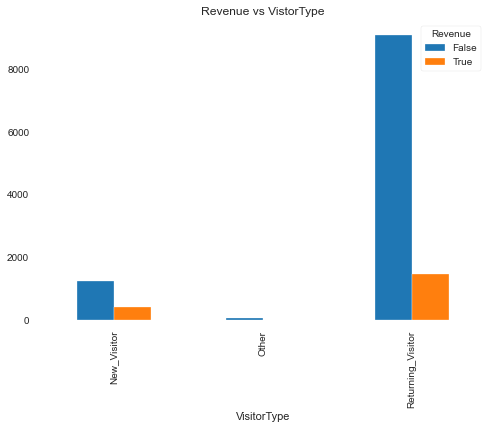

In [12]:
pd.crosstab(df.VisitorType, df.Revenue).plot(kind='bar', title='Revenue vs VistorType');

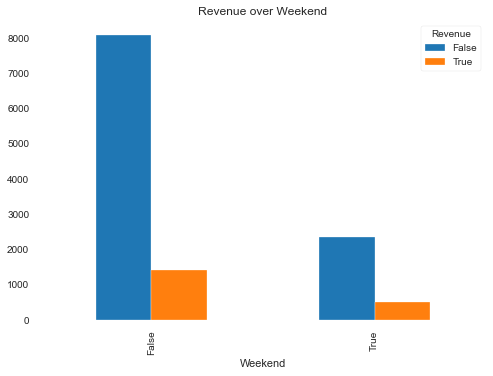

In [13]:
pd.crosstab(df.Weekend, df.Revenue).plot(kind='bar', title='Revenue over Weekend');

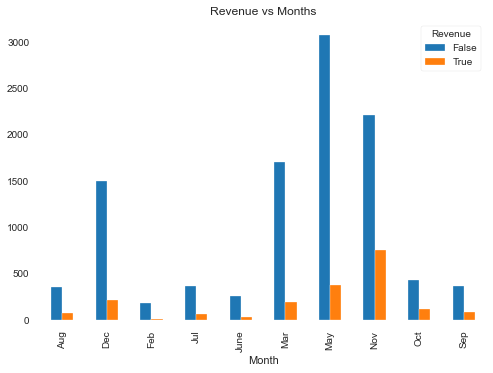

In [14]:
pd.crosstab(df.Month, df.Revenue).plot(kind='bar', title='Revenue vs Months');

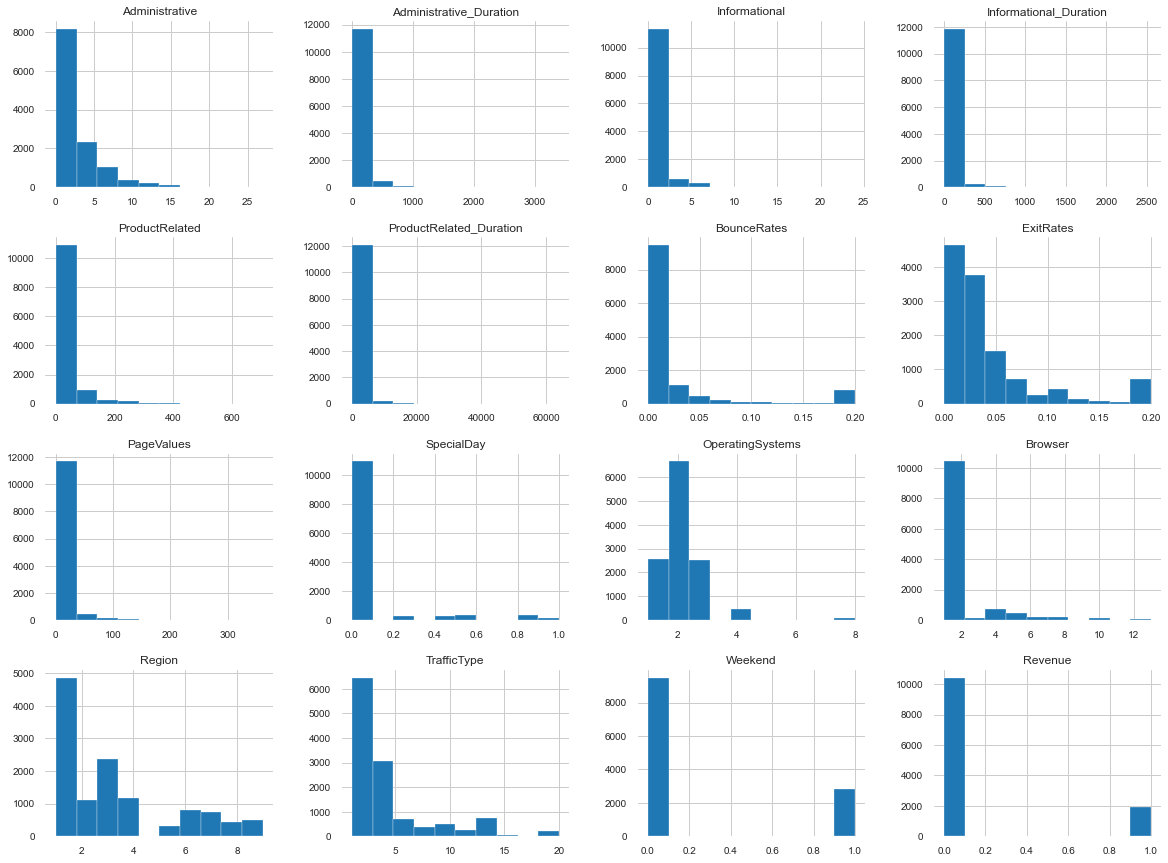

In [15]:
purchaseData = df.copy()
dataForHistogram = purchaseData.drop(['Weekend', 'Revenue'], axis=1)
dataForHistogram['Weekend'] = purchaseData['Weekend'].astype(float)
dataForHistogram['Revenue'] = purchaseData['Revenue'].astype(float)
dataForHistogram.hist(figsize=(20, 15))
plt.show()

## Calculate Correlation  

Then we create our correlation matrix. This matrix shows relation between our features.

In [16]:
corr = purchaseData.corr()
corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.594194,0.343218,0.253310,0.389776,0.367231,-0.204396,-0.309815,0.099658,-0.093000,-0.005572,-0.024817,-0.003501,-0.030121,0.025256,0.137334
Administrative_Duration,0.594194,1.000000,0.276485,0.235012,0.261336,0.347216,-0.132294,-0.203554,0.068451,-0.070258,-0.005387,-0.014544,-0.006009,-0.016666,0.016046,0.092046
Informational,0.343218,0.276485,1.000000,0.569752,0.318186,0.355319,-0.097342,-0.145086,0.049808,-0.039188,-0.012866,-0.031532,-0.029795,-0.037635,0.032816,0.087451
Informational_Duration,0.253310,0.235012,0.569752,1.000000,0.253969,0.342065,-0.071965,-0.104113,0.031159,-0.031005,-0.008317,-0.020072,-0.028416,-0.025339,0.025110,0.069807
ProductRelated,0.389776,0.261336,0.318186,0.253969,1.000000,0.776150,-0.172631,-0.261718,0.051322,-0.022995,0.002939,-0.017433,-0.036007,-0.041748,0.010749,0.148233
ProductRelated_Duration,0.367231,0.347216,0.355319,0.342065,0.776150,1.000000,-0.169659,-0.248890,0.052974,-0.035003,0.003285,-0.008844,-0.031176,-0.035123,0.009471,0.151461
BounceRates,-0.204396,-0.132294,-0.097342,-0.071965,-0.172631,-0.169659,1.000000,0.848937,-0.111442,0.065730,0.017501,-0.016042,-0.005546,0.072326,-0.043272,-0.136790
ExitRates,-0.309815,-0.203554,-0.145086,-0.104113,-0.261718,-0.248890,0.848937,1.000000,-0.173106,0.102147,0.016356,-0.004857,-0.010842,0.078041,-0.060849,-0.205557
PageValues,0.099658,0.068451,0.049808,0.031159,0.051322,0.052974,-0.111442,-0.173106,1.000000,-0.063576,0.019201,0.045774,0.011675,0.012381,0.012217,0.488011
SpecialDay,-0.093000,-0.070258,-0.039188,-0.031005,-0.022995,-0.035003,0.065730,0.102147,-0.063576,1.000000,0.013809,0.003682,-0.013122,0.052963,-0.019150,-0.080797


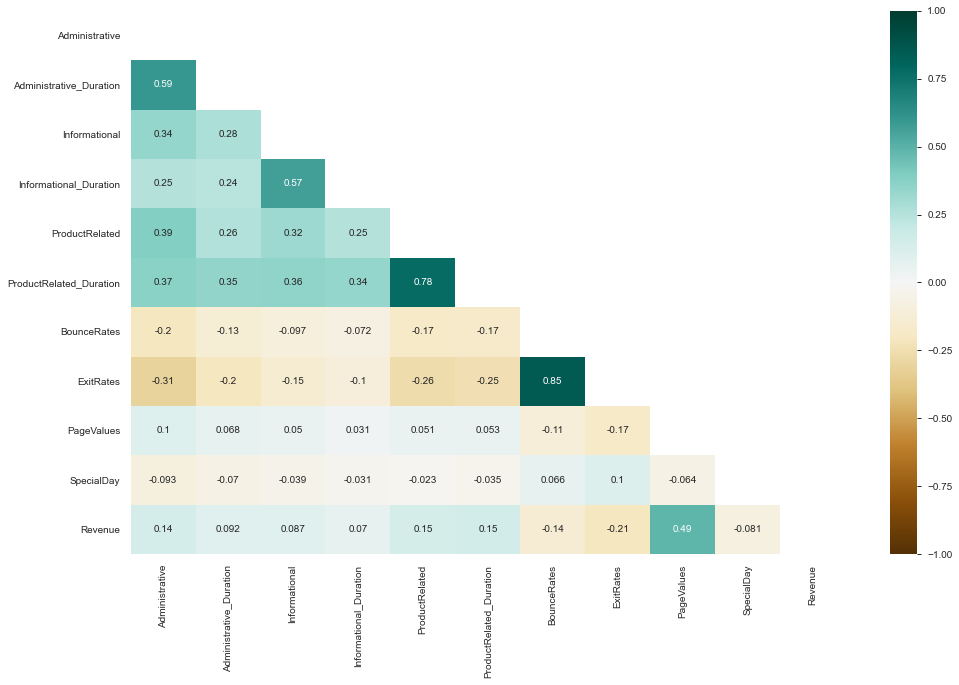

In [17]:
categorialColumns = ['OperatingSystems', 'Region', 'TrafficType','Browser', 'Weekend', 'Month', 'VisitorType']
numerical = purchaseData.drop(categorialColumns, axis=1)
correlation = numerical.corr()

mask = np.triu(np.ones_like(correlation, dtype='bool'))

plt.figure(figsize=(16, 10))
sns.heatmap(correlation, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

Revenue is the value that we want to predict.

In [18]:
corr['Revenue'].sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.488011
ProductRelated_Duration    0.151461
ProductRelated             0.148233
Administrative             0.137334
Administrative_Duration    0.092046
Informational              0.087451
Informational_Duration     0.069807
Weekend                    0.031359
Browser                    0.023429
TrafficType               -0.004594
Region                    -0.010565
OperatingSystems          -0.014570
SpecialDay                -0.080797
BounceRates               -0.136790
ExitRates                 -0.205557
Name: Revenue, dtype: float64

## Convert Categorical data to numerical data

In [19]:
df = pd.get_dummies(data=df, columns=['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month'], drop_first=True)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.Revenue)
df['Revenue'] = y

## Split data into Train and Test Part

In [20]:
col_names = ['PageValues', 'ExitRates', 'ProductRelated_Duration']
X = df[col_names]
y = df.Revenue

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

## Standardization

In [22]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

## Perform Knn Algoritm

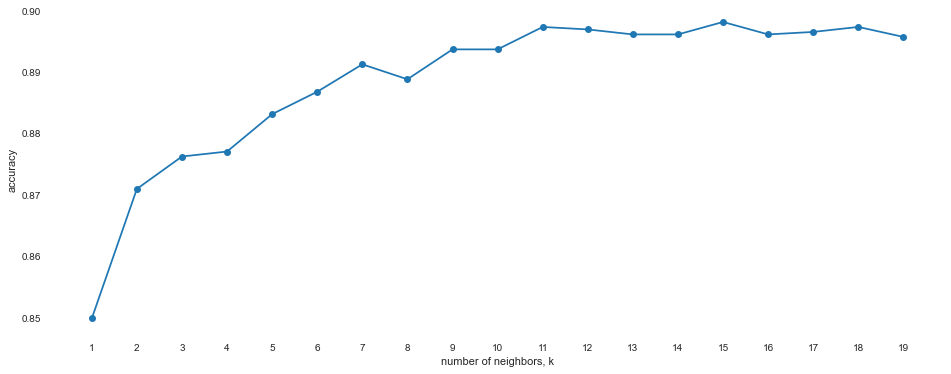

In [23]:
K = range(1, 20)
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scale, y_train)
    y_pred = knn.predict(X_test_scale)
    acc.append(accuracy_score(y_test, y_pred))


#plot the accuracy vs k to figure out best k 
plt.figure(figsize = (16,6))
plt.plot(K, acc, '-o')
plt.xlabel('number of neighbors, k')
plt.ylabel('accuracy')
plt.xticks(K)
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scale, y_train)
y_pred = knn.predict(X_test_scale)

print("accuracy_score: " , accuracy_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("precision_score: ", precision_score(y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(y_test, y_pred))

accuracy_score:  0.897404703974047
f1_score:  0.6317321688500728
recall_score:  0.5680628272251309
precision_score:  0.7114754098360656
roc_auc_score:  0.7629181698505693


## Perform Logistic Regression Algorithm

In [25]:
lr = LogisticRegression()
lr.fit(X_train_scale, y_train)
y_pred = lr.predict(X_test_scale)

print("accuracy_score: " , accuracy_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("precision_score: ", precision_score(y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(y_test, y_pred))


accuracy_score:  0.8844282238442822
f1_score:  0.4937833037300177
recall_score:  0.36387434554973824
precision_score:  0.7679558011049724
roc_auc_score:  0.6718603973430073


## Perform SVM Algorithm

In [26]:
svc = SVC(kernel = 'rbf')
svc.fit(X_train_scale, y_train)
y_preds = svc.predict(X_test_scale)

print("accuracy_score: " , accuracy_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("precision_score: ", precision_score(y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(y_test, y_pred))

accuracy_score:  0.8844282238442822
f1_score:  0.4937833037300177
recall_score:  0.36387434554973824
precision_score:  0.7679558011049724
roc_auc_score:  0.6718603973430073
